In [20]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
df = pd.read_csv('/content/sample_data/formspring_data.csv',delimiter='\t',quoting=3)
df = df[['ques','ans1']]  #limiting to question and answer 
#replacing html symbols
df['ques'] = df['ques'].str.replace('&#039;',' ')
df['ques'] = df['ques'].str.replace('&quot;',' ')
df['ques'] = df['ques'].str.replace('<br>',' ')    

In [22]:
df = df.dropna()
positives = df[df['ans1']=='Yes']
negatives = df[df['ans1']=='No']
frames = [positives,negatives]

In [23]:
df = pd.concat(frames)
df = df.sample(frac=1)

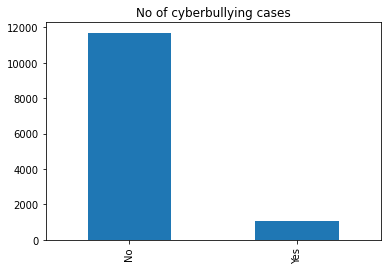

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

df['ans1'].value_counts().plot(kind='bar',title='No of cyberbullying cases')

In [25]:
df['ans1'] = df['ans1'].replace(('Yes','No'),(1,0))
bag = []
def clean_data(sentence):
    sentence = re.sub('[^a-zA-Z]',' ',sentence)
    sentence = sentence.lower().split()
    words = [word for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(words)
    bag.append(sentence)

In [26]:
df['ans1'] = df['ans1'].astype(int)
df.head()

,ques,ans1
4444,thatss coo (x,0
7277,Would u end up in heaven or hell. Or in purgat...,0
9669,Twitter Is Dead. Viva La Revolution!,0
541,Dont squirm motha fucka! its just a syringe. i...,1
3190,Besides the chick who&#39;s starting shit won...,1


In [27]:
df['ques'].apply(clean_data)
len(bag)

12729

In [28]:
y = df['ans1'].values

cv = CountVectorizer()
X_train,X_test,y_train,y_test = train_test_split(bag,y,test_size=0.3,random_state=0)  #0.3 in this case
cv.fit(X_train)
X_train = cv.transform(X_train).toarray() #create sparse matrix 
X_test = cv.transform(X_test).toarray()
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_pred = clf.predict(X_test)

In [30]:
score = accuracy_score(y_test,y_pred)
f1_score__ = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("Accuracy => ",score)
print("Recall => ",recall)
print("F1 score => ",f1_score__)

Accuracy =>  0.924063891070961
Recall =>  0.10666666666666667
F1 score =>  0.1807909604519774


In [31]:
precision =  precision_score(y_test,y_pred)
precision

0.5925925925925926

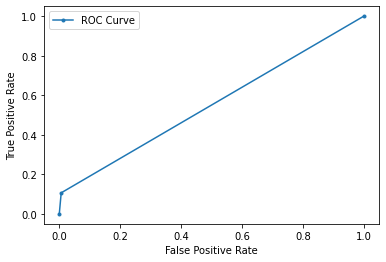

In [32]:
fp, tp, treshold = roc_curve(y_test, y_pred)
plt.plot(fp, tp, marker='.', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()